In [1]:
#GENERAL
import pandas as pd
import numpy as np
# import seaborn as sns
import matplotlib.pyplot as plt

#PATH PROCESS

import os
import os.path
from pathlib import Path
import glob
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import RMSprop,Adam,Optimizer,Optimizer, SGD
from skimage.feature import hessian_matrix, hessian_matrix_eigvals
# print(f"Tensor Flow Version: {tf.__version__}")
# print(f"Keras Version: {keras.__version__}")
# print()
# print(f"Pandas {pd.__version__}")
# gpu = len(tf.config.list_physical_devices('GPU'))>0
# print("GPU is", "available" if gpu else "NOT AVAILABLE")
# print(tf.config.list_physical_devices('GPU'))

## MAIN PATH

In [2]:
Label100_Path = Path("/kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/label100png")
Image100_Path = Path("/kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/100png")

## JPG PATH

In [3]:
Label_Path = list(Label100_Path.glob(r"**/*.png"))
Image_Path = list(Image100_Path.glob(r"**/*.png"))

In [4]:
print("LABEL LEN:",len(Label_Path))
print("---"*10)
print("IMAGE LEN:",len(Image_Path))
print(Label_Path[0])

LABEL LEN: 37800
------------------------------
IMAGE LEN: 18900
/kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/label100png/ADNI_100_S_0892_157893_L/ADNI_100_S_0892_157893_L_086.png


## SERIES

In [5]:
Label_Series = pd.Series(Label_Path,name="LABEL").astype(str)
Image_Series = pd.Series(Image_Path,name="IMAGE").astype(str)

In [6]:
print(len(Label_Series))
print(len(Image_Series))

37800
18900


In [7]:
print("LABEL TYPE:",type(Label_Series))
print("---"*10)
print("IMAGE TYPE:",type(Image_Series))

LABEL TYPE: <class 'pandas.core.series.Series'>
------------------------------
IMAGE TYPE: <class 'pandas.core.series.Series'>


In [8]:
print(Label_Series.head(-1))

0        /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
1        /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
2        /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
3        /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
4        /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
                               ...                        
37794    /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
37795    /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
37796    /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
37797    /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
37798    /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
Name: LABEL, Length: 37799, dtype: object


In [9]:
print(len(Label_Series))

37800


In [10]:
print(Image_Series.head(-1))

0        /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
1        /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
2        /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
3        /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
4        /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
                               ...                        
18894    /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
18895    /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
18896    /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
18897    /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
18898    /kaggle/input/mri-alzheimer-epilepsy-hippo-seg...
Name: IMAGE, Length: 18899, dtype: object


In [11]:
print("LABEL PATH LEN:",len(Label_Series[0]))
print("---"*10)
print("IMAGE PATH LEN:",len(Image_Series[0]))

LABEL PATH LEN: 125
------------------------------
IMAGE PATH LEN: 122


In [12]:
print("LABEL PATH EXAMPLE:\n",Label_Series[0])
print("LABEL PATH EXAMPLE:\n",Label_Series[6615])
print("---"*10)
print("IMAGE PATH EXAMPLE:\n",Image_Series[0])

LABEL PATH EXAMPLE:
 /kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/label100png/ADNI_100_S_0892_157893_L/ADNI_100_S_0892_157893_L_086.png
LABEL PATH EXAMPLE:
 /kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/label100png/ADNI_012_S_1292_99896_L/ADNI_012_S_1292_99896_L_146.png
------------------------------
IMAGE PATH EXAMPLE:
 /kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/100png/ADNI_123_S_0072_9753_ACPC/ADNI_123_S_0072_9753_ACPC_058.png


## SPLITTING FOR ONE SAMPLE

In [13]:
Split_Params_For_LABEL = "label100png/"
Split_Params_For_IMG = "100png/"

L_Main_Path,L_Target_Path = Label_Series[0].split(Split_Params_For_LABEL)
I_Main_Path,I_Target_Path = Image_Series[0].split(Split_Params_For_IMG)

print("LABEL MAIN: ",L_Main_Path)
print("LABEL TARGET: ",L_Target_Path)
print("---"*20)
print("IMG MAIN: ",I_Main_Path)
print("IMG TARGET: ",I_Target_Path)

LABEL MAIN:  /kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/
LABEL TARGET:  ADNI_100_S_0892_157893_L/ADNI_100_S_0892_157893_L_086.png
------------------------------------------------------------
IMG MAIN:  /kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/
IMG TARGET:  ADNI_123_S_0072_9753_ACPC/ADNI_123_S_0072_9753_ACPC_058.png


In [14]:
Common_Params = "/"

Label_Path_Before,Label_Path_After = L_Target_Path.split(Common_Params)
IMG_Path_Before,IMG_Path_After = I_Target_Path.split(Common_Params)

print("LABEL BEFORE: ",Label_Path_Before)
#print("LABEL MIDDLE: ",Label_Path_Middle)
print("LABEL AFTER: ",Label_Path_After)
print("---"*20)
print("IMG BEFORE: ",IMG_Path_Before)
print("IMG AFTER: ",IMG_Path_After)

LABEL BEFORE:  ADNI_100_S_0892_157893_L
LABEL AFTER:  ADNI_100_S_0892_157893_L_086.png
------------------------------------------------------------
IMG BEFORE:  ADNI_123_S_0072_9753_ACPC
IMG AFTER:  ADNI_123_S_0072_9753_ACPC_058.png


In [15]:
List_Split_Params = "_"

Label_Path_Split = Label_Path_After.split(List_Split_Params)
IMG_Path_Split = IMG_Path_After.split(List_Split_Params)

print("LABEL LIST: ",Label_Path_Split)
print("IMG LIST: ",IMG_Path_Split)
print("---"*20)
print("LABEL TARGET: ",Label_Path_Split[-2])
print("IMG TARGET: ",IMG_Path_Split[-1])

LABEL LIST:  ['ADNI', '100', 'S', '0892', '157893', 'L', '086.png']
IMG LIST:  ['ADNI', '123', 'S', '0072', '9753', 'ACPC', '058.png']
------------------------------------------------------------
LABEL TARGET:  L
IMG TARGET:  058.png


In [16]:
if Label_Path_Split[-2] == "L":
    
    print("IT'S LEFT")
            
elif Label_Path_Split[-2] == "R":
     
    print("IT'S RIGHT")

IT'S LEFT


## SPLITTING PROCESS

In [17]:
L_IMG = []
R_IMG = []


Split_Params_For_LABEL = "label100png/"
Split_Params_For_IMG = "100png/"

Common_Params = "/"

List_Split_Params = "_"


for label_x in list(Label_Series):
    
    try:
        
        L_Main_Path,L_Target_Path = label_x.split(Split_Params_For_LABEL)
       

        Label_Path_Before,Label_Path_After = L_Target_Path.split(Common_Params)
        

        Label_Path_Split = Label_Path_After.split(List_Split_Params)
        

        
        if Label_Path_Split[-2] == "L":

            L_IMG.append(label_x)
            
            
        elif Label_Path_Split[-2] == "R":
            
            
            R_IMG.append(label_x)
            
        else:
            print("SOMETHING IS WRONG!")
            
    except:
        print("LABEL: ",label_x)
        print("IMG: ",image_x)

In [18]:
Sort_L = sorted(L_IMG)
Sort_R = sorted(R_IMG)
Sort_IMG = sorted(Image_Series)

In [19]:
print("LABEL L:",len(L_IMG))
print("LABEL R:",len(R_IMG))

LABEL L: 18900
LABEL R: 18900


In [20]:
print(Sort_L[-1])
print(Sort_R[-1])
print(Sort_IMG[-1])

/kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/label100png/ADNI_136_S_0579_116340_L/ADNI_136_S_0579_116340_L_188.png
/kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/label100png/ADNI_136_S_0579_116340_R/ADNI_136_S_0579_116340_R_188.png
/kaggle/input/mri-alzheimer-epilepsy-hippo-segmentation/100png/ADNI_136_S_0579_116340_ACPC/ADNI_136_S_0579_116340_ACPC_188.png


## CHECKING FOR NO HIPPOCAMPUS OR HIPPOCAMPUS

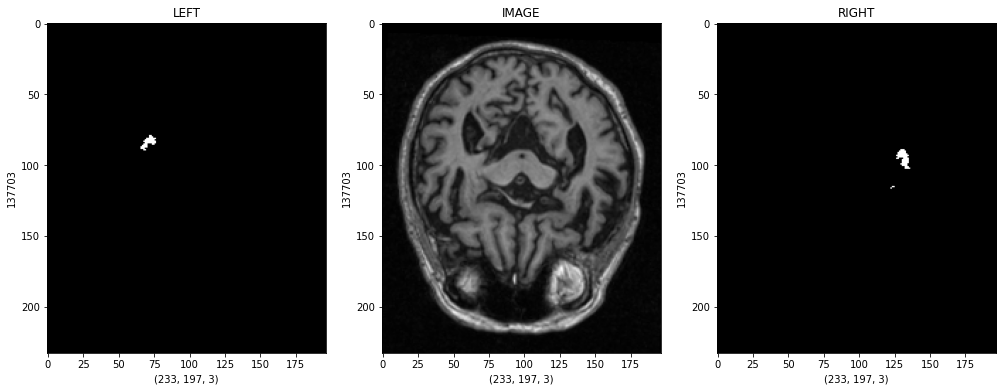

In [21]:
figure,axis = plt.subplots(1,3,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[15000]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[15000]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[15000]),cv2.COLOR_BGR2RGB)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)


In [ ]:
figure,axis = plt.subplots(20,20,figsize=(17,17))

for indexing,operations in enumerate(axis.flat):
    
    Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[indexing]),cv2.COLOR_BGR2RGB)
    
    operations.imshow(Example_IMG)
    operations.axis("off")

plt.tight_layout()
plt.show

In [ ]:
figure,axis = plt.subplots(20,20,figsize=(17,17))

for indexing,operations in enumerate(axis.flat):
    
    Example_IMG = cv2.cvtColor(cv2.imread(Sort_L[indexing]),cv2.COLOR_BGR2RGB)
    
    operations.imshow(Example_IMG)
    operations.axis("off")

plt.tight_layout()
plt.show

## HIPPOCAMPUS CONCAT

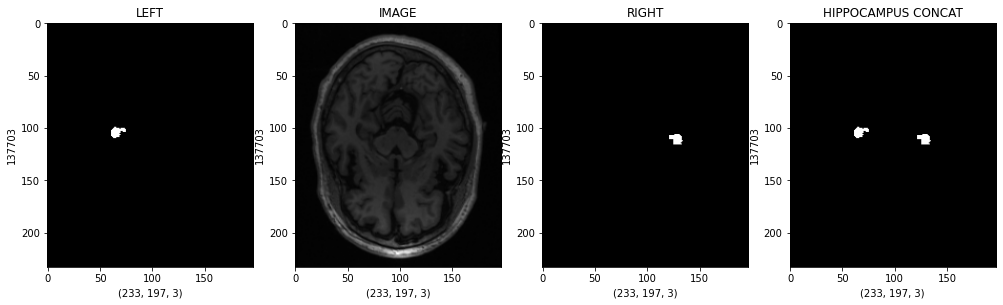

In [22]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1020]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1020]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1020]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Hıppocampus_Concat.shape)
axis[3].set_ylabel(Hıppocampus_Concat.size)
axis[3].set_title("HIPPOCAMPUS CONCAT")
axis[3].imshow(Hıppocampus_Concat)

## IMAGE AND HIPPOCAMPUS CONCAT

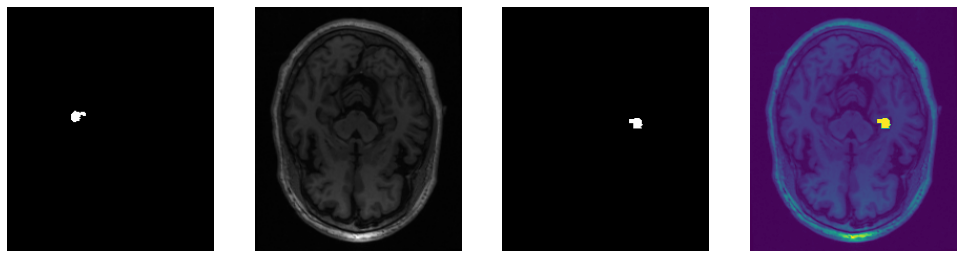

In [23]:
figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1020]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1020]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1020]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Main_Concat = cv2.addWeighted(Example_IMG[:,:,0],1,Example_R[:,:,0],1,0.2)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
# axis[0].set_title("LEFT")
axis[0].imshow(Example_L)
axis[0].axis('off')
figure.savefig('LEFT')

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
# axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)
axis[1].axis('off')
figure.savefig('LEFT')
axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
# axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)
axis[2].axis('off')
figure.savefig('LEFT')
axis[3].set_xlabel(Main_Concat.shape)
axis[3].set_ylabel(Main_Concat.size)
# axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
axis[3].imshow(Main_Concat)
axis[3].axis('off')
figure.savefig('LEFT')

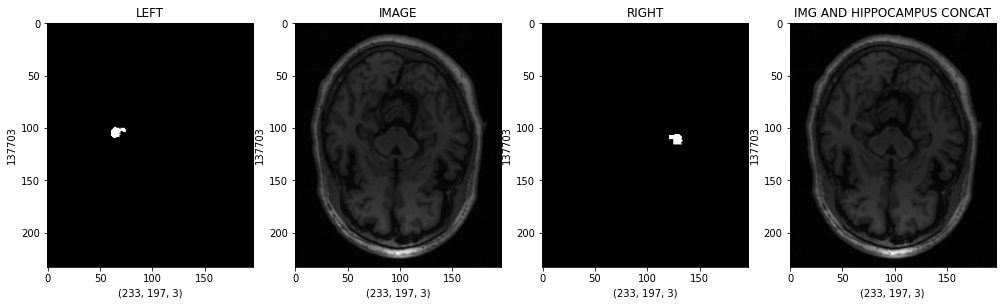

In [24]:

figure,axis = plt.subplots(1,4,figsize=(17,17))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1020]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1020]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1020]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)

Copy_Main = Example_IMG.copy()
Copy_Main[Hıppocampus_Concat[:,:,0] == 1] = [255,0,0]
Copy_Main[Hıppocampus_Concat[:,:,0] == 2] = [255,0,0]
    
Copy_Main_Two = Example_IMG.copy()
Blend_Image = cv2.addWeighted(Copy_Main,0.5,Copy_Main_Two,0.5,0,Copy_Main_Two)


axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Blend_Image.shape)
axis[3].set_ylabel(Blend_Image.size)
axis[3].set_title("IMG AND HIPPOCAMPUS CONCAT")
axis[3].imshow(Blend_Image)

(233, 197)


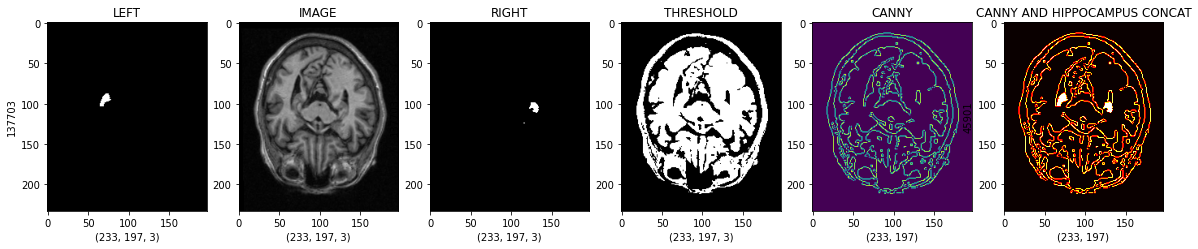

In [25]:
figure,axis = plt.subplots(1,6,figsize=(20,20))

Example_L = cv2.cvtColor(cv2.imread(Sort_L[1965]),cv2.COLOR_BGR2RGB)
Example_R = cv2.cvtColor(cv2.imread(Sort_R[1965]),cv2.COLOR_BGR2RGB)
Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[1965]),cv2.COLOR_BGR2RGB)
Hıppocampus_Concat = cv2.addWeighted(Example_L,1,Example_R,1,0.2)
_,Threshold_IMG = cv2.threshold(Example_IMG,70,255,cv2.THRESH_BINARY)
Canny_IMG = cv2.Canny(Threshold_IMG,100,100)
print(Canny_IMG.shape)
Canny_Hıppocampus_Concat = cv2.addWeighted(Canny_IMG,1,Hıppocampus_Concat[:,:,0],1,0.2)

axis[0].set_xlabel(Example_L.shape)
axis[0].set_ylabel(Example_L.size)
axis[0].set_title("LEFT")
axis[0].imshow(Example_L)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Example_R.shape)
axis[2].set_ylabel(Example_R.size)
axis[2].set_title("RIGHT")
axis[2].imshow(Example_R)

axis[3].set_xlabel(Threshold_IMG.shape)
axis[3].set_ylabel(Threshold_IMG.size)
axis[3].set_title("THRESHOLD")
axis[3].imshow(Threshold_IMG)

axis[4].set_xlabel(Canny_IMG.shape)
axis[4].set_ylabel(Canny_IMG.size)
axis[4].set_title("CANNY")
axis[4].imshow(Canny_IMG)

axis[5].set_xlabel(Canny_Hıppocampus_Concat.shape)
axis[5].set_ylabel(Canny_Hıppocampus_Concat.size)
axis[5].set_title("CANNY AND HIPPOCAMPUS CONCAT")
axis[5].imshow(Canny_Hıppocampus_Concat,cmap="hot")

## HESSIAN

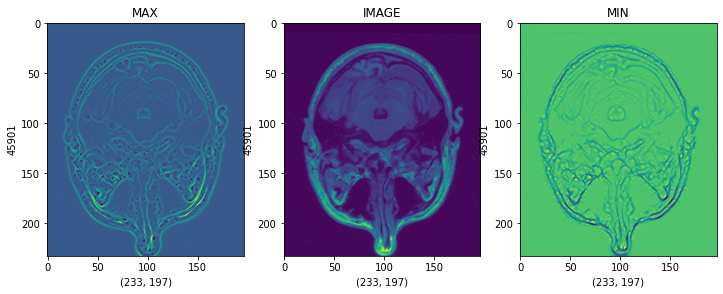

In [26]:
figure,axis = plt.subplots(1,3,figsize=(12,12))

Example_IMG = cv2.cvtColor(cv2.imread(Sort_IMG[50]),cv2.COLOR_BGR2GRAY)
Hessian_IMG = hessian_matrix(Example_IMG,sigma=0.5,order="rc")
Max_IMG,Min_IMG = hessian_matrix_eigvals(Hessian_IMG)



axis[0].set_xlabel(Max_IMG.shape)
axis[0].set_ylabel(Max_IMG.size)
axis[0].set_title("MAX")
axis[0].imshow(Max_IMG)

axis[1].set_xlabel(Example_IMG.shape)
axis[1].set_ylabel(Example_IMG.size)
axis[1].set_title("IMAGE")
axis[1].imshow(Example_IMG)

axis[2].set_xlabel(Min_IMG.shape)
axis[2].set_ylabel(Min_IMG.size)
axis[2].set_title("MIN")
axis[2].imshow(Min_IMG)

## DATA PROCESS

In [27]:
import skimage.transform as st
IMG_HEIGHT = 128
IMG_WIDTH = 128
images = []

masks = []
for id_ in list(Sort_IMG[:6615]):
    
    img = cv2.imread(id_,0) 
    img = st.resize(img, (IMG_HEIGHT, IMG_WIDTH), order=0, preserve_range=True, anti_aliasing=False)
    images.append(img)#Fill empty X_train with values from img

for xl,xr in zip(Sort_L[:6615],Sort_R[:6615]):  
    
    maskl = cv2.imread(xl,0)
    maskl = st.resize(maskl, (IMG_HEIGHT, IMG_WIDTH), order=0, preserve_range=True, anti_aliasing=False)
    maskr = cv2.imread(xr,0)
    maskr = st.resize(maskr, (IMG_HEIGHT, IMG_WIDTH), order=0, preserve_range=True, anti_aliasing=False)
    mask_L = np.array(maskl)
    mask_R = np.array(maskr)
    mask_ = np.add(mask_L,mask_R)
    masks.append(mask_)

In [28]:
mask_dataset = np.array(masks)
image_dataset = np.array(images)
image_dataset = np.expand_dims(image_dataset, axis = 3)
mask_dataset = np.expand_dims(mask_dataset, axis = 3)

In [29]:
print("Image data shape is: ", image_dataset.shape)
print("Mask data shape is: ", mask_dataset.shape)
print("Max pixel value in image is: ", image_dataset.max())
print("Labels in the mask are : ", np.unique(mask_dataset))

Image data shape is:  (6615, 128, 128, 1)
Mask data shape is:  (6615, 128, 128, 1)
Max pixel value in image is:  255
Labels in the mask are :  [  0 255]


In [30]:
image_dataset = image_dataset /255.  #Can also normalize or scale using MinMax scaler
#Do not normalize masks, just rescale to 0 to 1.
mask_dataset = mask_dataset /255

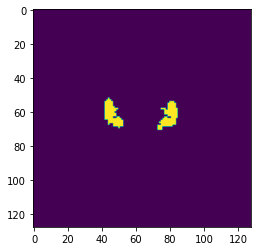

In [31]:
plt.imshow(mask_dataset[262])

In [32]:
print(np.unique(mask_dataset))

[0. 1.]


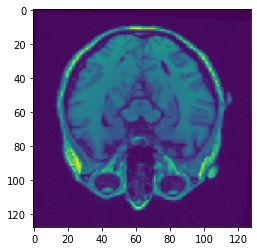

In [33]:
plt.imshow(image_dataset[262])


## TO ARRAY

In [34]:
#Split train and valid
X_Main, X_test, y_Main, y_test = train_test_split(image_dataset, mask_dataset, test_size=0.2,random_state = 42)
X_train, X_valid, y_train, y_valid = train_test_split(X_Main, y_Main, test_size=0.2,random_state=42)#%%>>> from sympy.polys.domains import ZZ

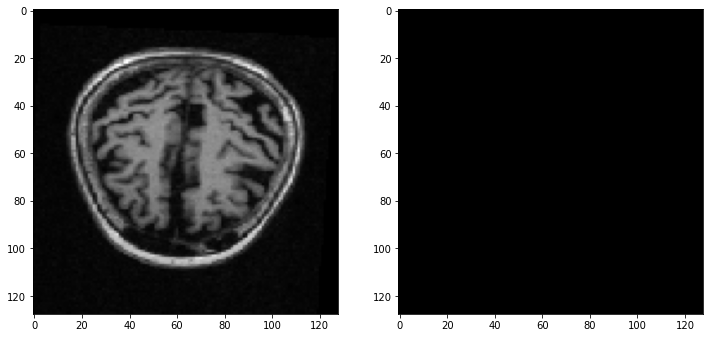

In [35]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(X_train[220,:,:,0], cmap='gray')
plt.subplot(122)
plt.imshow(y_train[220,:,:,0], cmap='gray')
plt.show()
     

## MODEL 

In [ ]:
# Building Unet by dividing encoder and decoder into blocks

from keras.models import Model
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from tensorflow.keras.optimizers import Adam
from keras.layers import Activation, MaxPool2D, Concatenate


def conv_block(input, num_filters):
    x = Conv2D(num_filters, 3, padding="same")(input)
    x = BatchNormalization()(x)   #Not in the original network. 
    x = Activation("relu")(x)

    x = Conv2D(num_filters, 3, padding="same")(x)
    x = BatchNormalization()(x)  #Not in the original network
    x = Activation("relu")(x)

    return x

#Encoder block: Conv block followed by maxpooling


def encoder_block(input, num_filters):
    x = conv_block(input, num_filters)
    p = MaxPool2D((2, 2))(x)
    return x, p   

#Decoder block
#skip features gets input from encoder for concatenation

def decoder_block(input, skip_features, num_filters):
    x = Conv2DTranspose(num_filters, (2, 2), strides=2, padding="same")(input)
    x = Concatenate()([x, skip_features])
    x = conv_block(x, num_filters)
    return x

#Build Unet using the blocks
def build_unet(input_shape, n_classes):
    inputs = Input(input_shape)

    s1, p1 = encoder_block(inputs, 64)
    s2, p2 = encoder_block(p1, 128)
    s3, p3 = encoder_block(p2, 256)
    s4, p4 = encoder_block(p3, 512)

    b1 = conv_block(p4, 1024) #Bridge

    d1 = decoder_block(b1, s4, 512)
    d2 = decoder_block(d1, s3, 256)
    d3 = decoder_block(d2, s2, 128)
    d4 = decoder_block(d3, s1, 64)

    if n_classes == 1:  #Binary
        activation = 'sigmoid'
    else:
        activation = 'softmax'

    outputs = Conv2D(n_classes, 1, padding="same", activation=activation)(d4)  #Change the activation based on n_classes
    print(activation)

    model = Model(inputs, outputs, name="U-Net")
    return model
     

In [ ]:
model = build_unet(input_shape=(128,128,1), n_classes=1)
#metrics = ['accuracy',sm.metrics.IOUScore(threshold=0.5), sm.metrics.FScore(threshold=0.5)]
model.compile(optimizer=Adam(learning_rate = 1e-4), loss='binary_crossentropy', metrics="accuracy")
model.summary()
     

In [ ]:
history = model.fit(X_train, y_train, 
                    batch_size = 32, 
                    verbose=1, 
                    epochs=25, 
                    validation_data=(X_valid, y_valid), 
                    shuffle=False)

In [ ]:
plt. figure (figsize=(8, 8)) 
plt.title("Learning curve")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history ["val_loss"], label="val_loss")
plt.plot(np.argmin (history. history ["val_loss"]), np.min(history.history["val_loss"]), marker="x", color="r",
label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend()

In [ ]:
plt. figure (figsize=(8, 8)) 
plt.title("Learning curve")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history ["val_accuracy"], label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("score")
plt.legend()

In [ ]:
# ### Inference
# In [10]:
#load the best model
model.load_weights ('seg-Mod_unet b5')
# In [20]:
#Evaluate on validation set (this must be equals to the best log_loss)
model.evaluate (X_test, y_test, verbose=1)


In [ ]:
prediction = (model.predict(image_dataset)[0,:,:,0] > 0.5).astype(np.uint8)
for i in range(0,250):
    plt.imshow(prediction[i,:,:,0], cmap='gray')
    plt.show()

In [ ]:
threshold = 0.5
for  i in range(0,100):
    test_img_number = i
    print(i)
    test_img = X_test[test_img_number]
    ground_truth=y_test[test_img_number]
    test_img_input=np.expand_dims(test_img, 0)
    print(test_img_input.shape)
    prediction = (model.predict(test_img_input)[0,:,:,0]>0.5).astype(np.uint8)
    print(prediction.shape)
    print(np.unique(prediction))
    plt.figure(figsize=(16, 8))
    plt.subplot(231)
    plt.title('Testing Image')
    plt.imshow(test_img[:,:,0], cmap='gray')
    plt.subplot(232)
    plt.title('Testing Label')
    plt.imshow(ground_truth[:,:,0], cmap='gray')
    plt.subplot(233)
    plt.title('Prediction on test image')
    plt.imshow(prediction, cmap='gray')

    plt.show()

In [ ]:
test_img_number = 46
test_img = X_test[test_img_number]
ground_truth=y_test[test_img_number]
test_img_input=np.expand_dims(test_img, 0)
print(test_img_input.shape)
prediction = (model.predict(test_img_input)[0,:,:,0]>0.5).astype(np.uint8)
ground_truth = np.add(test_img,ground_truth)
print(prediction.shape)
print(np.unique(prediction))
prediction = np.add(test_img[:,:,0],prediction)

plt.figure(figsize=(16, 8))
plt.subplot(231)
plt.title('Testing Image')
plt.imshow(test_img[:,:,0], cmap='gray')
plt.subplot(232)
plt.title('Testing Label')
plt.imshow(ground_truth[:,:,0], cmap='gray')
plt.subplot(233)
plt.title('Prediction on test image')
plt.imshow(prediction[:,:], cmap='gray')

plt.show()




In [ ]:
from skimage.io import imread, imshow
preds_test = model.predict(X_test, verbose=1)
preds_test_t = (preds_test>0.5).astype(np.uint8)
ix = 3
imshow(X_test[ix])
plt.show()
imshow(np.squeeze(y_test[ix]))
plt.show()
imshow(np.squeeze(preds_test_t[ix]))
plt.title('predict')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
prediction = model.predict(X_test)
prediction = prediction.reshape(-1)
prediction = (prediction>0.5).astype(int)
y_test = y_test.astype(int)
y_testing = y_test.reshape(-1)
fpr, tpr, thresholds = roc_curve(y_testing, prediction)

# plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve Unet')
plt.show()

In [ ]:
print(np.arange(0, 1.01, 0.05))

In [ ]:
thresholds = list (np.array(list (range(0, 101, 1)))/100)
print(thresholds)

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
prediction = model.predict(X_test)
prediction = prediction.reshape(-1)
y_test = y_test.astype(int)
y_testing = y_test.reshape(-1)

tplist = []
fplist = []

for thr in np.arange(0, 1.01, 0.05):
    temp =[]
    for u in prediction:
        if u < thr:
            temp.append(0)
        else:
            temp.append(1)
            
    falsepositive = 0
    truepositive = 0
    for t, y in zip(temp, y_testing):
        if (t == 1) and (y == 0):
            falsepositive += 1
        if (t == 1) and (y == 1):
            truepositive += 1
    
    tplist.append(truepositive/len(temp))
    fplist.append(falsepositive/len(temp))
            

# fpr, tpr, thresholds = roc_curve(fplist,tplist) 

# # plot the ROC curve
# plt.plot(fpr, tpr)
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC curve')
# plt.show()

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
prediction = model.predict(X_test)
prediction = prediction.reshape(-1)

y_test = y_test.astype(int)
y_testing = y_test.reshape(-1)
# Set the range of thresholds
thresholds = np.arange(0, 1.01, 0.01)

# Initialize lists to store the false positive rate (FPR) and true positive rate (TPR) at each threshold
roc_point= []

# Iterate over the thresholds
for threshold in thresholds:
    # Compute the FPR and TPR at the current threshold
    fpr, tpr, _= roc_curve(y_testing, prediction > threshold)
    
    # Store the FPR and TPR
    roc_point.append([tpr[1],fpr[1]])



In [ ]:
print(roc_point)

In [ ]:
import pandas as pd
# Plot the ROC curves
pivot = pd.DataFrame (roc_point, columns = ["x", "y"])
pivot["threshold"] = thresholds
print(pivot)

In [ ]:
plt.plot (pivot.y, pivot.x)
# Add labels and a title
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC curves")


In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
# Create the KFold object with 5 folds
kfold = KFold(n_splits=5)

# Initialize a list to store the accuracy scores
accuracy_scores = []

# Loop through the folds
for train_index, test_index in kfold.split(image_dataset):
    # Split the data into train and test sets
    X_train, X_test = image_dataset[train_index], image_dataset[test_index]
    y_train, y_test = mask_dataset[train_index], mask_dataset[test_index]
    y_test = y_test.astype(int)
    y_testing = y_test.reshape(-1)
    # Fit the model on the train set
    model.fit(X_train, y_train)

    # Predict the labels on the test set
    y_pred = model.predict(X_test)
    y_pred =  y_pred.reshape(-1)
    y_pred = (y_pred>0.5).astype(int)
    # Calculate the accuracy score
    accuracy = accuracy_score(y_testing, y_pred)

    # Add the accuracy score to the list
    accuracy_scores.append(accuracy)

# Calculate the mean accuracy score
mean_accuracy = np.mean(accuracy_scores)
print(f'Mean accuracy: {mean_accuracy:.3f}')

In [ ]:
preds_test = model.predict(X_test, verbose=1)
ix = 43
fig, ax = plt.subplots (1, 3, figsize=(20, 10))
ax[0].imshow (X_test[ix], cmap='seismic')
ax[0].set_title('test image')
ax[1].imshow (y_test[ix].squeeze())
ax[1].set_title('ground truth')

ax [2].imshow (preds_test[ix]. squeeze (), vmin=0, vmax=1)
ax[2].set_title('Predicted')


In [ ]:
preds_test = model.predict(X_test, verbose=1)
ix = 43
fig, ax = plt.subplots (1, 3, figsize=(20, 10))
ax[0].imshow (X_test[ix], cmap='seismic')
ax[0].set_title('test image')
ax[1].imshow (y_test[ix].squeeze())
ax[1].set_title('ground truth')

ax [2].imshow (preds_test[ix]. squeeze (), vmin=0, vmax=1)
ax[2].set_title('Predicted')